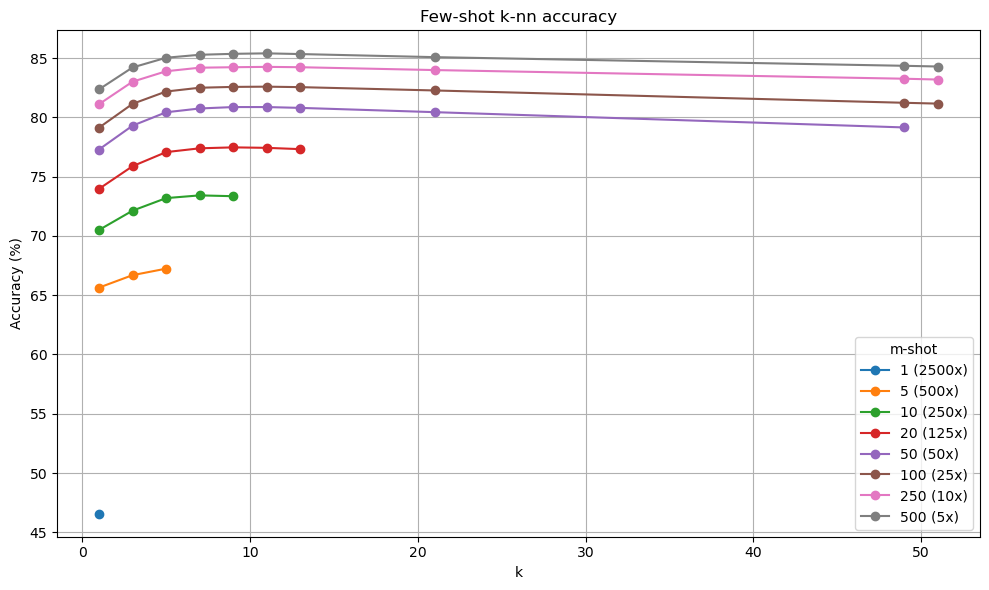

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('few_shot_combined.csv')

# Convert 'k / m' column to integer
df.rename(columns={df.columns[0]: "k"}, inplace=True)
df["k"] = pd.to_numeric(df["k"], errors='coerce')

# Extract only the mean part from accuracy (remove ±...)
def extract_mean(value):
    if pd.isna(value) or value == '-':
        return np.nan
    return float(value.split('±')[0])

# Apply extraction to all cells
for col in df.columns[1:]:
    df[col] = df[col].apply(extract_mean)

# Plotting
plt.figure(figsize=(10, 6))
for col in df.columns[1:]:
    plt.plot(df["k"], df[col], marker='o', label=col)

plt.xlabel("k")
plt.ylabel("Accuracy (%)")
plt.title("Few-shot k-nn accuracy")
plt.legend(title="m-shot")
plt.grid(True)
plt.tight_layout()
plt.show()